# RAINFALL IN AUSTRALIA

CONTEXT:
Predict next-day rain by training classification models on the target variable RainTomorrow.
CONTENT:
This dataset contains about 10 years of daily weather observations from many locations across Australia.
RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

ORIGINAL STRUCTURE:
145460 observations, 23 features

SOURCE AND ACKNOWLEDGEMENTS:
KAGGLE dataset “Rain in Australia” by Joe Young and other collaborators
Observations were drawn from numerous weather stations. The daily observations are available from http://www.bom.gov.au/climate/data.
An example of latest weather observations in Canberra: http://www.bom.gov.au/climate/dwo/IDCJDW2801.latest.shtml
Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml
Data source: http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data.
Copyright Commonwealth of Australia 2010, Bureau of Meteorology.


In [1]:
#Import libraries

# Standard imports
import pandas as pd
import numpy as np

# Visualization tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing

from sklearn.experimental import enable_iterative_imputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report

In [2]:
rain_df = pd.read_csv(r'weatherAUS.csv', header = 0, sep = ',')

## 1. EXPLORATORY DATA ANALYSIS

In [3]:
# Review sample

rain_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
#Check size of dataframe

rain_df.shape

(145460, 23)

In [5]:
#Check number of NaN entries

rain_df.isna().sum() 

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
#Check percentage proportion of NaN entries

round(rain_df.isna().sum()/len(rain_df)*100,1)

Date              0.0
Location          0.0
MinTemp           1.0
MaxTemp           0.9
Rainfall          2.2
Evaporation      43.2
Sunshine         48.0
WindGustDir       7.1
WindGustSpeed     7.1
WindDir9am        7.3
WindDir3pm        2.9
WindSpeed9am      1.2
WindSpeed3pm      2.1
Humidity9am       1.8
Humidity3pm       3.1
Pressure9am      10.4
Pressure3pm      10.3
Cloud9am         38.4
Cloud3pm         40.8
Temp9am           1.2
Temp3pm           2.5
RainToday         2.2
RainTomorrow      2.2
dtype: float64

In [7]:
#Check proportion of null entries to compare with NaN (double check that missing values are NaN and not other category)

rain_df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
rain_df.Location.value_counts()

Canberra            3436
Sydney              3344
Adelaide            3193
Brisbane            3193
Hobart              3193
Melbourne           3193
Perth               3193
Darwin              3193
GoldCoast           3040
Ballarat            3040
MountGambier        3040
MountGinini         3040
Cairns              3040
Bendigo             3040
AliceSprings        3040
Albany              3040
Albury              3040
Townsville          3040
Launceston          3040
Wollongong          3040
Penrith             3039
Tuggeranong         3039
Newcastle           3039
SydneyAirport       3009
Cobar               3009
CoffsHarbour        3009
Watsonia            3009
Witchcliffe         3009
WaggaWagga          3009
Portland            3009
Sale                3009
BadgerysCreek       3009
Williamtown         3009
Woomera             3009
Mildura             3009
NorfolkIsland       3009
Richmond            3009
PearceRAAF          3009
Dartmoor            3009
Moree               3009


In [9]:
# Transform 'yes' and 'no' into binary output for 'RainToday' and 'RainTomorrow' variables

rain_df.RainToday = rain_df.RainToday.map({'No': 0, 'Yes': 1})
rain_df.RainTomorrow = rain_df.RainTomorrow.map({'No': 0, 'Yes': 1})

In [10]:
# Delete all rows for "RainToday" and "RainTomorrow" containing NaN.

rain_df.dropna(subset = ["RainToday", "RainTomorrow" ], inplace=True)

## 2.CHECK FOR CLASS IMBALANCE & BASELINE ACCURACY

In [11]:
#Check for imbalance in data set for 'RainToday' category

rain_df.RainToday.sum()/ len(rain_df.RainToday)

0.2234226171450489

In [12]:
#Check for imbalance in data set for Target Variable 'RainTomorrow'

pos_rain = rain_df.RainTomorrow.sum()/ len(rain_df.RainTomorrow)

pos_rain

0.22161847329654016

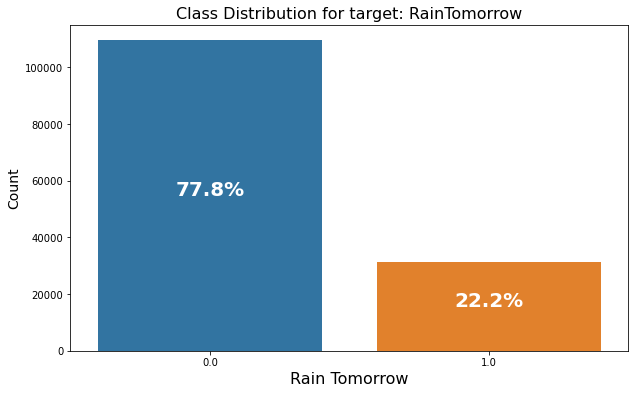

In [13]:
# Checking for the class imbalance
fig = plt.figure(figsize = (10, 6))
axis = sns.countplot(x = 'RainTomorrow', data = rain_df);
axis.set_title('Class Distribution for target: RainTomorrow', size = 16);

for patch in axis.patches:
    axis.text(x = patch.get_x() + patch.get_width()/2, y = patch.get_height()/2, 
            s = f"{np.round(patch.get_height()/len(rain_df)*100, 1)}%", 
            ha = 'center', size = 20, rotation = 0, weight = 'bold' ,color = 'white')
    
axis.set_xlabel('Rain Tomorrow', size = 16)
axis.set_ylabel('Count', size = 14);

In [14]:
#BASELINE ACCURACY

Baseline_acc = (1 - pos_rain)*100
Baseline_acc

77.83815267034598

In [15]:
# Create subset of dataframe where RainToday is positive (1)

rain_today_df = rain_df[rain_df['RainToday']==1]

rain_today_df.shape

(31455, 23)

In [16]:
rain_tomorrow = rain_today_df['RainTomorrow'].sum()

In [17]:
# Calculate probability of rain tomorrow if it rains today

rain_tomorrow_prob = rain_tomorrow / rain_today_df.shape[0]*100
rain_tomorrow_prob

46.40597679224289

In [18]:
#Baseline accuracy for rain tomorrow if it rains today

Baseline_acc_raintoday = 100 - rain_tomorrow_prob
Baseline_acc_raintoday

53.59402320775711

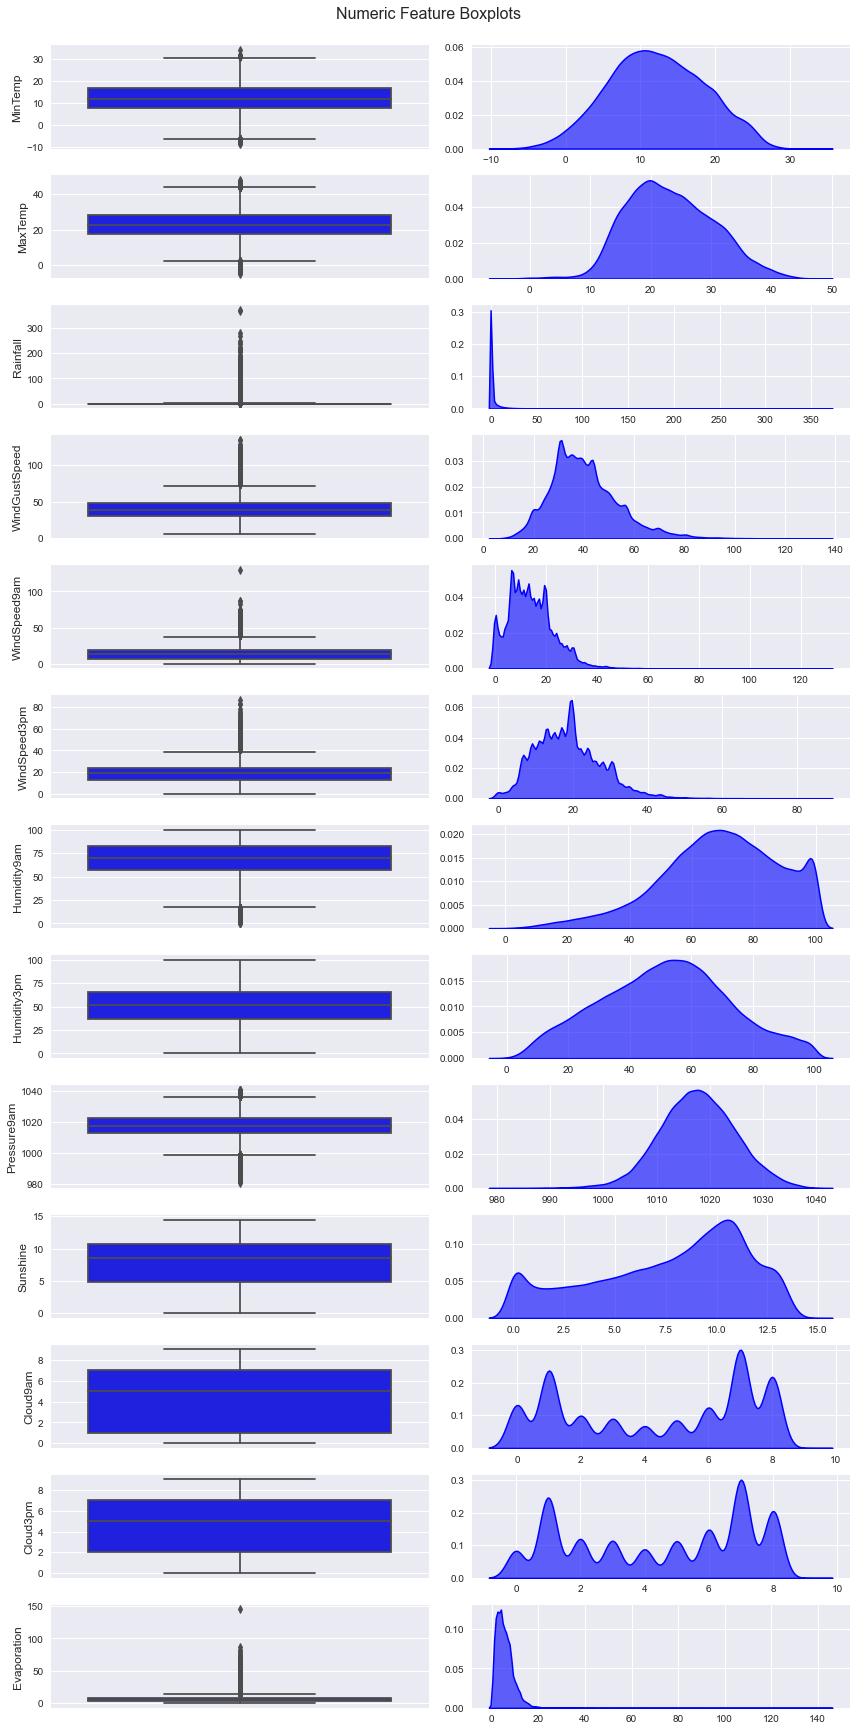

In [19]:
numeric_col = ['MinTemp', 'MaxTemp', 'Rainfall','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
               'Humidity9am','Humidity3pm', 'Pressure9am', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Evaporation']

plt.style.use('seaborn')
fig, axis = plt.subplots(13, 2, figsize = (12, 24))
for i, num_var in enumerate(numeric_col):
    
    # Checking for the outliers using boxplot
    sns.boxplot(y = num_var, data = rain_df, ax = axis[i][0], color = 'blue')
    
    # Checking for the distribution using kdeplot
    sns.kdeplot(x = num_var, data = rain_df, ax = axis[i][1], color = 'blue',
               fill = True, alpha = 0.6, linewidth = 1.5)
    
    axis[i][0].set_ylabel(f"{num_var}", fontsize = 12)
    axis[i][0].set_xlabel(None)
    axis[i][1].set_xlabel(None)
    axis[i][1].set_ylabel(None)

fig.suptitle('Numeric Feature Boxplots', fontsize = 16, y = 1)
plt.tight_layout()

## 3. CHECK FOR CORRELATION AND MULTI-COLLINEARITY

<AxesSubplot:>

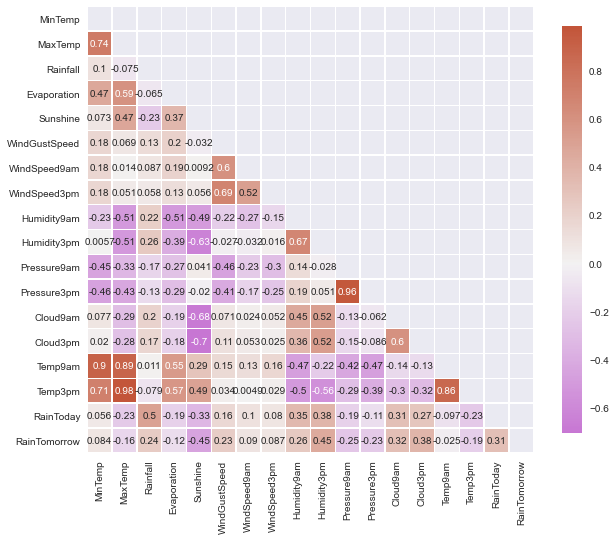

In [20]:
corr = rain_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, axes = plt.subplots(1,1,figsize=(10,10))
cmap = sns.diverging_palette(300, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, mask=mask, square=True
            , linewidths=.5, cbar_kws={"shrink": .75}
            , center=0, annot = True, ax=axes)

In [21]:
#CHECK AND MINIMISE MULTI-COLLINEARITY

#DROP THE FOLLOWING:

#'Pressure3pm' as this has high correlation with 'Pressure9am'
#'Temp9am' and 'MaxTemp' as these have higher correlation with 'Temp3pm'

rain_df.drop(['Pressure3pm','Temp9am', 'MaxTemp'], axis = 1, inplace = True)

In [22]:
rain_df.shape

(140787, 20)

In [23]:
rain_df.dtypes

Date              object
Location          object
MinTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Cloud9am         float64
Cloud3pm         float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
dtype: object

In [24]:
#Create subset of numeric features that will have NaN entries replaced by the IterativeImputer

numeric_cols = [col for col in rain_df.columns if rain_df[col].dtype == float]
numeric_cols

['MinTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Cloud9am',
 'Cloud3pm',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

## 4. USING ITERATIVE IMPUTER TO REPLACE NaN ENTRIES

In [25]:
# Replace NaN with numeric values determined by the iterative imputer

from sklearn.impute import IterativeImputer

imptr = IterativeImputer(imputation_order='ascending', max_iter=1000)

numeric_df = imptr.fit_transform(rain_df[numeric_cols])
rain_numeric_df = pd.DataFrame(numeric_df, columns=numeric_cols)


In [26]:
rain_numeric_df.head()

,MinTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow
0,13.4,0.6,6.573820,6.752406,44.0,20.0,24.0,71.0,22.0,1007.7,8.000000,4.945491,21.8,0.0,0.0
1,7.4,0.0,6.623835,11.065102,44.0,4.0,22.0,44.0,25.0,1010.6,1.845178,2.714469,24.3,0.0,0.0
2,12.9,0.0,8.010544,11.010891,46.0,19.0,26.0,38.0,30.0,1007.6,2.314554,2.000000,23.2,0.0,0.0
3,9.2,0.0,6.942286,11.274447,24.0,11.0,9.0,45.0,16.0,1017.6,1.498717,2.049022,26.5,0.0,0.0
4,17.5,1.0,6.802123,6.032625,41.0,7.0,20.0,82.0,33.0,1010.8,7.000000,8.000000,29.7,0.0,0.0


In [27]:
rain_numeric_df.shape

(140787, 15)

## 5. RE-CHECK CORRELATION MATRIX TO ENSURE CONSISTENCY AFTER ITERATIVE IMPUTATION

<AxesSubplot:>

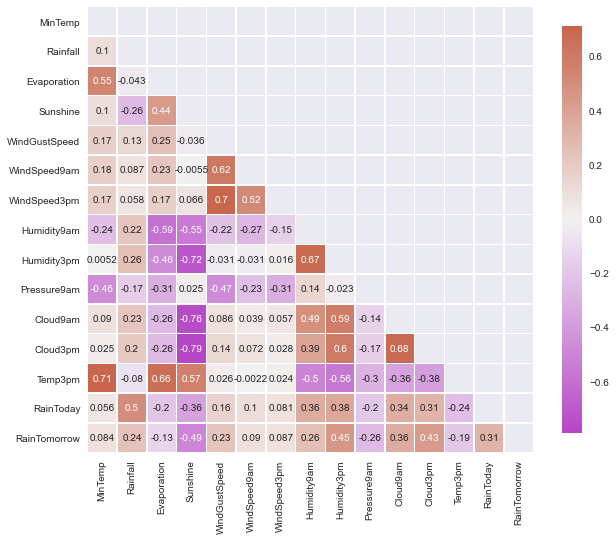

In [28]:
#Re-check correlation matrix to ensure that correlation has not been modified excessively but the iterative imputation

corr = rain_numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, axes = plt.subplots(1,1,figsize=(10,10))
cmap = sns.diverging_palette(300, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, mask=mask, square=True
            , linewidths=.5, cbar_kws={"shrink": .75}
            , center=0, annot = True, ax=axes)

In [29]:
#Create subset of categorical features that will have NaN entries replaced by random sampling
categorical_cols = [col for col in rain_df.columns if rain_df[col].dtype == object]
categorical_cols

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [30]:
categorical_cols.remove('Date'),categorical_cols.remove('Location')

(None, None)

In [31]:
categorical_cols

['WindGustDir', 'WindDir9am', 'WindDir3pm']

In [32]:
rain_cat_df = rain_df.loc[:, ('WindGustDir', 'WindDir9am', 'WindDir3pm')]
rain_cat_df

,WindGustDir,WindDir9am,WindDir3pm
0,W,W,WNW
1,WNW,NNW,WSW
2,WSW,W,WSW
3,NE,SE,E
4,W,ENE,NW
...,...,...,...
145454,E,ESE,E
145455,E,SE,ENE
145456,NNW,SE,N
145457,N,SE,WNW


## 6. REPLACE CATEGORICAL FEATURES WITH PROBABILITY DISTRIBUTION OF CURRENT FEATURES

In [33]:
#Replace NaN entries in categorical features with probability distribution of current feature records

for cols in rain_cat_df.columns:
    vals = rain_cat_df.WindDir3pm.value_counts().reset_index()['index'].values
    prob = rain_cat_df[cols].value_counts(normalize=True).values
    rain_cat_df[cols].replace(np.nan, np.random.choice(a=vals, p=prob), inplace=True)


In [34]:
rain_cat_df.isna().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
dtype: int64

In [35]:
rain_cat_df.shape

(140787, 3)

In [36]:
df_date_location = rain_df.loc[:,('Date', 'Location')]


In [37]:
df_date_location.shape

(140787, 2)

## 7. RE-ASSEMBLY OF DATASET INCORPORATING MODIFIED FEATURES

In [38]:
#Combine and re-assemble feature-engineered dataframe subsets into single rain_final dataframe

rain_mod = pd.concat(objs=[df_date_location.reset_index(drop=True), 
                                   rain_numeric_df.reset_index(drop=True), 
                                   rain_cat_df.reset_index(drop=True)                                   
                                  ], 
                             axis=1
                            )

In [39]:
rain_mod.shape

(140787, 20)

In [40]:
rain_mod.isna().any()

Date             False
Location         False
MinTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustSpeed    False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Cloud9am         False
Cloud3pm         False
Temp3pm          False
RainToday        False
RainTomorrow     False
WindGustDir      False
WindDir9am       False
WindDir3pm       False
dtype: bool

In [41]:
rain_mod.corr()

,MinTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.103946,0.547158,0.103830,0.172394,0.176136,0.174797,-0.237315,0.005179,-0.463430,0.089753,0.024990,0.711494,0.056256,0.084412
Rainfall,0.103946,1.000000,-0.043156,-0.256919,0.133079,0.087387,0.058364,0.224779,0.256830,-0.172335,0.227449,0.202349,-0.079520,0.500997,0.239032
Evaporation,0.547158,-0.043156,1.000000,0.440432,0.247711,0.229064,0.169305,-0.589991,-0.463143,-0.313479,-0.258149,-0.260628,0.658784,-0.200836,-0.134048
Sunshine,0.103830,-0.256919,0.440432,1.000000,-0.036378,-0.005493,0.065722,-0.548273,-0.716226,0.024639,-0.760317,-0.792010,0.569737,-0.364118,-0.492543
WindGustSpeed,0.172394,0.133079,0.247711,-0.036378,1.000000,0.616384,0.698619,-0.219224,-0.030728,-0.468669,0.086439,0.135735,0.026337,0.155427,0.233649
WindSpeed9am,0.176136,0.087387,0.229064,-0.005493,0.616384,1.000000,0.524602,-0.270772,-0.030622,-0.233298,0.039472,0.072021,-0.002164,0.102736,0.090021
WindSpeed3pm,0.174797,0.058364,0.169305,0.065722,0.698619,0.524602,1.000000,-0.147600,0.016331,-0.311334,0.057195,0.027795,0.023994,0.080768,0.087374
Humidity9am,-0.237315,0.224779,-0.589991,-0.548273,-0.219224,-0.270772,-0.147600,1.000000,0.672245,0.144297,0.493737,0.389866,-0.500999,0.355067,0.258973
Humidity3pm,0.005179,0.256830,-0.463143,-0.716226,-0.030728,-0.030622,0.016331,0.672245,1.000000,-0.022665,0.590879,0.601309,-0.558140,0.381179,0.450694
Pressure9am,-0.463430,-0.172335,-0.313479,0.024639,-0.468669,-0.233298,-0.311334,0.144297,-0.022665,1.000000,-0.140911,-0.165094,-0.296209,-0.195862,-0.255081


In [42]:
# Change date to show month 

# Parse the date into datetime format

rain_mod['Date'] = pd.to_datetime(rain_mod['Date'])

In [43]:
# Extract month from date

rain_mod['Month'] = rain_mod['Date'].dt.month

rain_mod['Month'].tail()

140782    6
140783    6
140784    6
140785    6
140786    6
Name: Month, dtype: int64

In [44]:
rain_mod.drop(['Date','Location','WindGustDir','WindDir9am', 'WindDir3pm'], axis = 1, inplace = True)

In [45]:
rain_final = rain_mod

In [46]:
rain_final.corr()

,MinTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow,Month
MinTemp,1.000000,0.103946,0.547158,0.103830,0.172394,0.176136,0.174797,-0.237315,0.005179,-0.463430,0.089753,0.024990,0.711494,0.056256,0.084412,-0.203964
Rainfall,0.103946,1.000000,-0.043156,-0.256919,0.133079,0.087387,0.058364,0.224779,0.256830,-0.172335,0.227449,0.202349,-0.079520,0.500997,0.239032,-0.030863
Evaporation,0.547158,-0.043156,1.000000,0.440432,0.247711,0.229064,0.169305,-0.589991,-0.463143,-0.313479,-0.258149,-0.260628,0.658784,-0.200836,-0.134048,-0.051066
Sunshine,0.103830,-0.256919,0.440432,1.000000,-0.036378,-0.005493,0.065722,-0.548273,-0.716226,0.024639,-0.760317,-0.792010,0.569737,-0.364118,-0.492543,0.010895
WindGustSpeed,0.172394,0.133079,0.247711,-0.036378,1.000000,0.616384,0.698619,-0.219224,-0.030728,-0.468669,0.086439,0.135735,0.026337,0.155427,0.233649,0.060460
WindSpeed9am,0.176136,0.087387,0.229064,-0.005493,0.616384,1.000000,0.524602,-0.270772,-0.030622,-0.233298,0.039472,0.072021,-0.002164,0.102736,0.090021,0.051158
WindSpeed3pm,0.174797,0.058364,0.169305,0.065722,0.698619,0.524602,1.000000,-0.147600,0.016331,-0.311334,0.057195,0.027795,0.023994,0.080768,0.087374,0.059990
Humidity9am,-0.237315,0.224779,-0.589991,-0.548273,-0.219224,-0.270772,-0.147600,1.000000,0.672245,0.144297,0.493737,0.389866,-0.500999,0.355067,0.258973,-0.090668
Humidity3pm,0.005179,0.256830,-0.463143,-0.716226,-0.030728,-0.030622,0.016331,0.672245,1.000000,-0.022665,0.590879,0.601309,-0.558140,0.381179,0.450694,-0.021303
Pressure9am,-0.463430,-0.172335,-0.313479,0.024639,-0.468669,-0.233298,-0.311334,0.144297,-0.022665,1.000000,-0.140911,-0.165094,-0.296209,-0.195862,-0.255081,0.038697


In [47]:
rain_final.shape

(140787, 16)

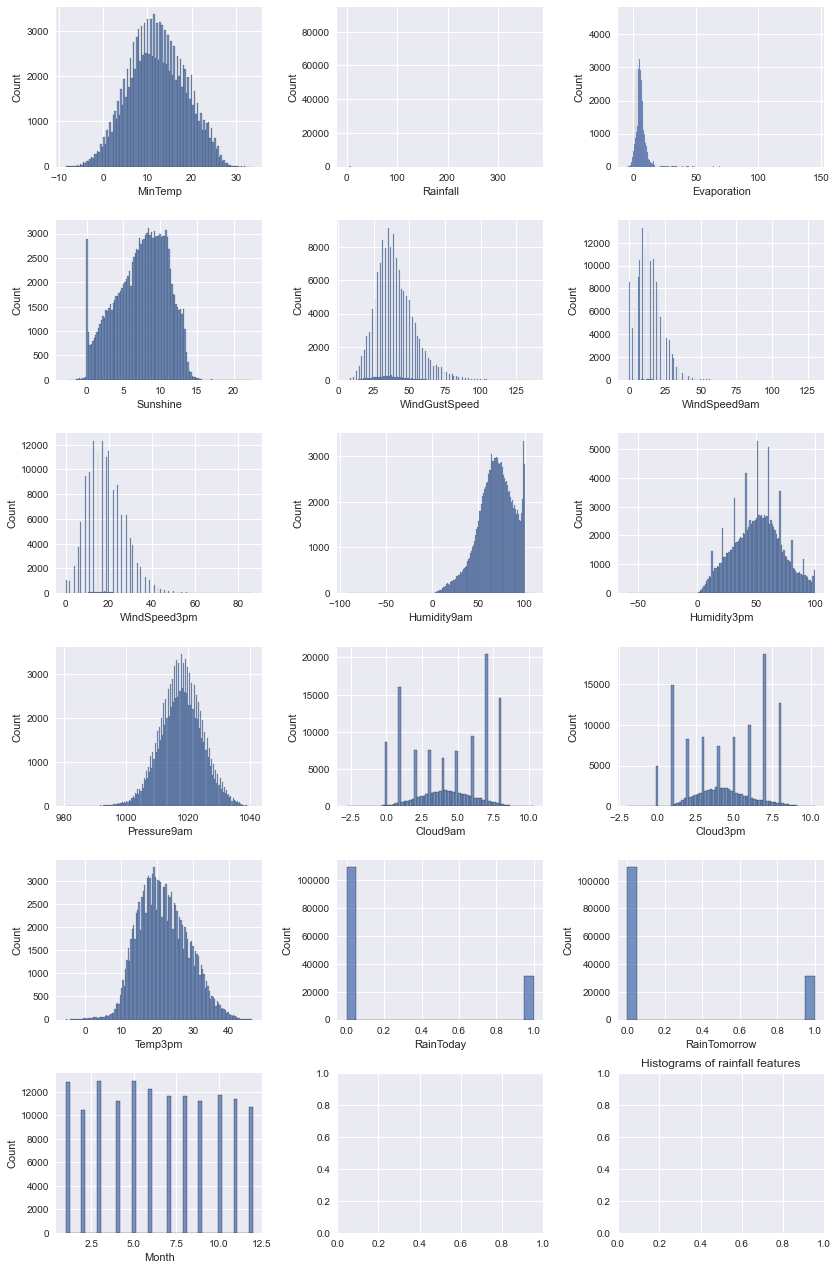

In [104]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 18))
axes = axes.reshape(-1)

continuous = [col for col in rain_final.columns if rain_final[col].dtype != object]
for i, col in enumerate(continuous):
    sns.histplot(rain_final[col], ax=axes[i])

fig.tight_layout(pad=2.0)
plt.title('Histograms of rainfall features');

### CHECK STATISTICAL DISTRIBUTION USING DESCRIBE FUNCTION

In [48]:
rain_final.describe()


,MinTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow,Month
count,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000
mean,12.185343,2.349974,5.084787,7.448815,39.745438,13.989631,18.617894,68.888076,51.486128,1017.804351,4.366527,4.465090,21.732450,0.223423,0.221618,6.403482
std,6.398611,8.465173,3.683196,3.463607,13.506221,8.862650,8.751556,19.047060,20.728168,6.888713,2.550258,2.370593,6.936526,0.416541,0.415337,3.426583
min,-8.500000,0.000000,-4.674606,-2.864639,6.000000,-1.425902,0.000000,-92.478176,-59.315374,980.500000,-2.783044,-1.970532,-5.400000,0.000000,0.000000,1.000000
25%,7.600000,0.000000,2.600000,5.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.300000,2.000000,2.596152,16.700000,0.000000,0.000000,3.000000
50%,12.000000,0.000000,4.604556,7.800394,38.372438,13.000000,19.000000,70.000000,52.000000,1017.900000,4.543553,4.514023,21.200000,0.000000,0.000000,6.000000
75%,16.800000,0.800000,6.800000,10.186833,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,7.000000,7.000000,26.500000,0.000000,0.000000,9.000000
max,33.900000,371.000000,145.000000,22.634131,137.263584,130.000000,87.000000,110.146923,100.000000,1041.000000,10.337516,10.281961,46.700000,1.000000,1.000000,12.000000


## 8. SETTING PREDICTIVE & TARGET VARIABLE

In [49]:
y = rain_final['RainTomorrow'] #Set target
X = rain_final.drop(['RainTomorrow'], axis = 1) #Set feature variables

X

,MinTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,RainToday,Month
0,13.4,0.6,6.573820,6.752406,44.0,20.0,24.0,71.0,22.0,1007.7,8.000000,4.945491,21.8,0.0,12
1,7.4,0.0,6.623835,11.065102,44.0,4.0,22.0,44.0,25.0,1010.6,1.845178,2.714469,24.3,0.0,12
2,12.9,0.0,8.010544,11.010891,46.0,19.0,26.0,38.0,30.0,1007.6,2.314554,2.000000,23.2,0.0,12
3,9.2,0.0,6.942286,11.274447,24.0,11.0,9.0,45.0,16.0,1017.6,1.498717,2.049022,26.5,0.0,12
4,17.5,1.0,6.802123,6.032625,41.0,7.0,20.0,82.0,33.0,1010.8,7.000000,8.000000,29.7,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,3.5,0.0,4.433097,10.098943,31.0,15.0,13.0,59.0,27.0,1024.7,1.896302,2.507768,20.9,0.0,6
140783,2.8,0.0,4.939361,10.806266,31.0,13.0,11.0,51.0,24.0,1024.6,1.129723,2.222009,22.4,0.0,6
140784,3.6,0.0,4.887565,11.347392,22.0,13.0,9.0,56.0,21.0,1023.5,1.002814,1.857814,24.5,0.0,6
140785,5.4,0.0,5.892828,11.038058,37.0,9.0,9.0,53.0,24.0,1021.0,1.178625,2.383502,26.1,0.0,6


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [51]:
X_train.shape, X_test.shape

((112629, 15), (28158, 15))

### Check proportion of samples with RainTomorrow = 1

In [52]:
#Proportion of sample with RainTomorrow = 1

y_train.sum(), y_test.sum(), y_train.sum()/len(y_train), y_test.sum()/len(y_test)

(24961.0, 6240.0, 0.2216214296495574, 0.22160664819944598)

## 9. PERFORM COMBINED OVER AND UNDER-SAMPLING INCORPORATING SMOTE

In [53]:
# Combine over and under sampling

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

under = RandomUnderSampler(sampling_strategy=0.5)
over = SMOTE(sampling_strategy=0.55)

#Fit and apply the transform
X_train, y_train = under.fit_resample(X_train, y_train)
X_train, y_train = over.fit_resample(X_train, y_train)

### Apply standardised scaling

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

## 10. MODELLING

### LOGISTIC REGRESSION 

In [55]:
from sklearn.linear_model import LogisticRegression
L_model = LogisticRegression(max_iter = 5000)

L_model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [56]:
# predict test class:

y_pred_lr = L_model.predict(X_test)

for col in zip(X.columns, L_model.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  

MinTemp     -0.427771
Rainfall    +0.004707
Evaporation  -0.068760
Sunshine    -1.469359
WindGustSpeed  +0.764191
WindSpeed9am  -0.170792
WindSpeed3pm  -0.081907
Humidity9am  +0.008784
Humidity3pm  +1.115350
Pressure9am  -0.462485
Cloud9am    -0.407849
Cloud3pm    +0.072139
Temp3pm     +0.939589
RainToday   +0.201326
Month       +0.098455


In [57]:
# predicted test probability:

from sklearn.metrics import accuracy_score

L_acc = accuracy_score(y_test, y_pred_lr)
L_acc

0.8440940407699411

In [58]:
from sklearn.model_selection import GridSearchCV

lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

logreg = LogisticRegression(max_iter = 500, solver = 'liblinear')

logreg_cv = GridSearchCV(logreg, lr_params, n_jobs = -1,cv =5)
best_model = logreg_cv.fit(X_train, y_train)

print(f"Optimised parameter Penalty:, {best_model.best_estimator_.get_params()['penalty']}")
print(f"Optimised parameter C:, {best_model.best_estimator_.get_params()['C']}")

results = logreg_cv.cv_results_
pd.DataFrame.from_dict(results)

Optimised parameter Penalty:, l1
Optimised parameter C:, 1


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.264187,0.621046,0.064404,0.080111,1,l1,"{'C': 1, 'penalty': 'l1'}",0.817459,0.820302,0.821530,0.818105,0.822165,0.819912,0.001851,1
1,1.699097,0.540066,0.154409,0.123903,1,l2,"{'C': 1, 'penalty': 'l2'}",0.817524,0.820367,0.821595,0.817976,0.822100,0.819912,0.001859,3
2,3.286988,0.929669,0.017001,0.015034,10,l1,"{'C': 10, 'penalty': 'l1'}",0.817459,0.820367,0.821530,0.818041,0.822165,0.819912,0.001866,1
3,1.540488,0.469402,0.016201,0.011941,10,l2,"{'C': 10, 'penalty': 'l2'}",0.817524,0.820367,0.821595,0.817847,0.822165,0.819899,0.001902,4
4,3.042974,0.625729,0.009201,0.002135,100,l1,"{'C': 100, 'penalty': 'l1'}",0.817459,0.820367,0.821595,0.817847,0.822165,0.819887,0.001918,6
5,1.416281,0.449220,0.008800,0.001833,100,l2,"{'C': 100, 'penalty': 'l2'}",0.817524,0.820367,0.821595,0.817847,0.822165,0.819899,0.001902,4


### Confusion Matrix - logistic regression

In [92]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lr)
cm_df = pd.DataFrame(cm)
cm_df.rename(columns={0:'Predict sunny', 1:'Predict rain'}, 
                 index={0:'Actual sunny',1:'Actual rain'}, 
                 inplace=True)

cm_df

,Predict sunny,Predict rain
Actual sunny,19458,2460
Actual rain,1930,4310


In [59]:
# Print classification report

from sklearn.metrics import classification_report

target_names = ['class_0', 'class_1']

print(classification_report(y_test, y_pred_lr, target_names=target_names))

              precision    recall  f1-score   support

     class_0       0.91      0.89      0.90     21918
     class_1       0.64      0.69      0.66      6240

    accuracy                           0.84     28158
   macro avg       0.77      0.79      0.78     28158
weighted avg       0.85      0.84      0.85     28158



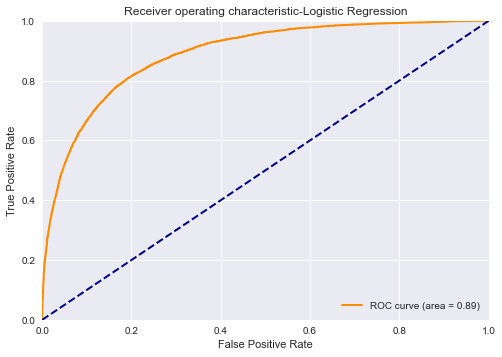

In [60]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = L_model.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic-Logistic Regression')
plt.legend(loc = "lower right")
plt.show()

### LINEAR SVC

In [61]:
from sklearn.svm import LinearSVC

svc_model = LinearSVC(max_iter=1000,verbose=0)
svc_model.fit(X_train, y_train)

# predict test class:
y_pred_svc = svc_model.predict(X_test)

from sklearn.metrics import accuracy_score

svc_acc = accuracy_score(y_test, y_pred_svc)

svc_acc

C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8448753462603878

In [ ]:
svc_params = {
    'C': [1, 10, 100],
    'loss': ['hinge', 'squared_hinge']   
}

from sklearn.svm import LinearSVC

svc = LinearSVC(max_iter=20000,verbose=0)
clf = GridSearchCV(svc, svc_params, n_jobs = -1,cv =3)
best_model = clf.fit(X_train, y_train)

print(f"Optimised parameter C:, {best_model.best_estimator_.get_params()['C']}")
print(f"Optimised parameter loss:, {best_model.best_estimator_.get_params()['loss']}")
print(f"Best score:, {best_model.best_score_}")


results = clf.cv_results_
pd.DataFrame.from_dict(results)

In [101]:
### Confusion Matrix - Linear SVC

In [102]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_svc)
cm_df = pd.DataFrame(cm)
cm_df.rename(columns={0:'Predict sunny', 1:'Predict rain'}, 
                 index={0:'Actual sunny',1:'Actual rain'}, 
                 inplace=True)

cm_df

,Predict sunny,Predict rain
Actual sunny,19489,2429
Actual rain,1939,4301


In [62]:
# Print SVC classification report

from sklearn.metrics import classification_report

target_names = ['class_0', 'class_1']

print(classification_report(y_test, y_pred_svc, target_names=target_names))

              precision    recall  f1-score   support

     class_0       0.91      0.89      0.90     21918
     class_1       0.64      0.69      0.66      6240

    accuracy                           0.84     28158
   macro avg       0.77      0.79      0.78     28158
weighted avg       0.85      0.84      0.85     28158



### RANDOM FOREST CLASSIFIER

In [63]:
rf = RandomForestClassifier(random_state=42, max_depth = 10)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_train_rf =  rf.predict(X_train)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_train_rf))

Accuracy: 0.8609986504723347
Accuracy: 0.8643818090179506


In [64]:
#Random Forest classifier

target_names = ['class_0', 'class_1']

print(classification_report(y_test, y_pred_rf, target_names=target_names))

              precision    recall  f1-score   support

     class_0       0.91      0.91      0.91     21918
     class_1       0.68      0.70      0.69      6240

    accuracy                           0.86     28158
   macro avg       0.80      0.80      0.80     28158
weighted avg       0.86      0.86      0.86     28158



### Confusion Matrix - Random Forest

In [96]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(cm)
cm_df.rename(columns={0:'Predict sunny', 1:'Predict rain'}, 
                 index={0:'Actual sunny',1:'Actual rain'}, 
                 inplace=True)

cm_df

,Predict sunny,Predict rain
Actual sunny,19858,2060
Actual rain,1854,4386


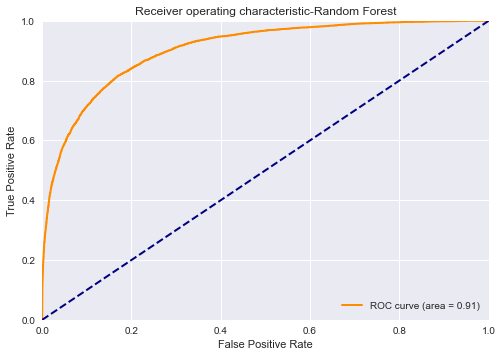

In [65]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = rf.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic-Random Forest')
plt.legend(loc = "lower right")
plt.show()

In [ ]:
param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [50,100,150],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

In [ ]:
CV_rfc.best_params_

### KNN NEAREST NEIGHBOURS

In [66]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=2)

# fit on the unstandardized data:

knn.fit(X_train, y_train)

# predict the response values for the observations in X ("test the model")
# store the predicted response values
y_pred_knn = knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
# 

Accuracy: 0.8420697492719653


In [94]:
# plot test accuracy by number of neighbors:
from sklearn.model_selection import cross_val_score
k_range = range(1, 91)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_test, y_test, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

KeyboardInterrupt: 

### Confusion Matrix - KNN

In [98]:
### Confusion Matrix - Gaussian Naive Bayes

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_knn)
cm_df = pd.DataFrame(cm)
cm_df.rename(columns={0:'Predict sunny', 1:'Predict rain'}, 
                 index={0:'Actual sunny',1:'Actual rain'}, 
                 inplace=True)

cm_df

,Predict sunny,Predict rain
Actual sunny,20402,1516
Actual rain,2931,3309


In [67]:
#KNN classification report

target_names = ['class_0', 'class_1']

print(classification_report(y_test, y_pred_knn, target_names=target_names))

              precision    recall  f1-score   support

     class_0       0.87      0.93      0.90     21918
     class_1       0.69      0.53      0.60      6240

    accuracy                           0.84     28158
   macro avg       0.78      0.73      0.75     28158
weighted avg       0.83      0.84      0.83     28158



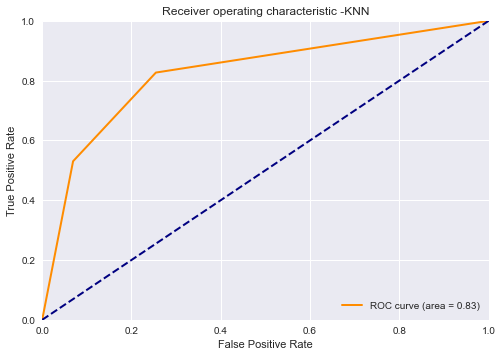

In [68]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = knn.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic -KNN')
plt.legend(loc = "lower right")
plt.show()

### GAUSSIAN NAIVE BAYES

In [69]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)
gnb_model.score(X_test, y_test)

0.7899353647276085

### Confusion Matrix - Gaussian Naive Bayes

In [99]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gnb)
cm_df = pd.DataFrame(cm)
cm_df.rename(columns={0:'Predict sunny', 1:'Predict rain'}, 
                 index={0:'Actual sunny',1:'Actual rain'}, 
                 inplace=True)

cm_df

,Predict sunny,Predict rain
Actual sunny,17694,4224
Actual rain,1691,4549


In [70]:
#GNB Classification report

target_names = ['class_0', 'class_1']

print(classification_report(y_test, y_pred_gnb, target_names=target_names))

              precision    recall  f1-score   support

     class_0       0.91      0.81      0.86     21918
     class_1       0.52      0.73      0.61      6240

    accuracy                           0.79     28158
   macro avg       0.72      0.77      0.73     28158
weighted avg       0.83      0.79      0.80     28158



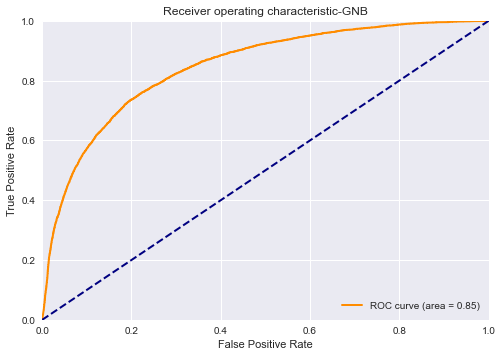

In [71]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = gnb_model.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic-GNB')
plt.legend(loc = "lower right")
plt.show()

C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=1 as keyword args. From version 1.0

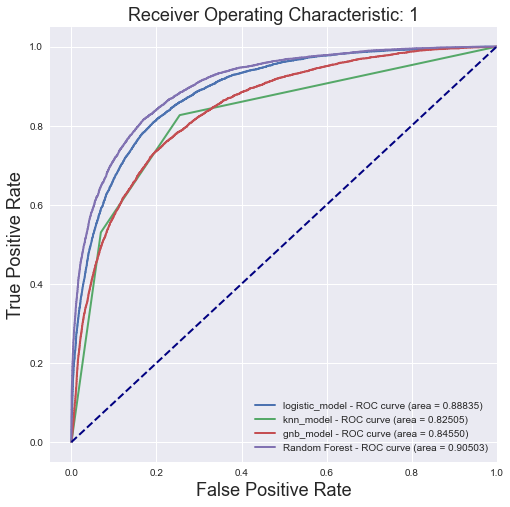

In [72]:
def plot_roc(y_test, preds, pos_label=None, labels=None):
    y_list = [y_test] if type(y_test) is not list else y_test
    pred_list = [preds] if type(preds) is not list else preds
    labels_list = [f'{labels}'] * len(pred_list) if type(labels) is not list else labels

    fig, ax = plt.subplots(1,1,figsize=[8,8])
    for y, pred, label in zip(y_list, pred_list, labels_list):
        fpr, tpr, _ = metrics.roc_curve(y, pred, pos_label)

        # Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
        roc_auc = metrics.auc(fpr, tpr)

        # Plot the ROC Curve    
        ax.plot(fpr, tpr, lw = 2, label = f'{label} - ROC curve (area = {roc_auc:0.5f})')
    plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('Receiver Operating Characteristic: 1', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

y_pred_list = [L_model.predict_proba(X_test)[:,1], knn.predict_proba(X_test)[:,1], gnb_model.predict_proba(X_test)[:,1], rf.predict_proba(X_test)[:,1]]
labels = ['logistic_model', 'knn_model', 'gnb_model','Random Forest']
plot_roc([y_test]*4, y_pred_list, pos_label = 1, labels=labels)

## PERFORM RECURSIVE FEATURE ANALYSIS

In [73]:
# Perform analyses using reduced number of variables from RFE analysis

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe = RFE(estimator=LogisticRegression(max_iter=5000), n_features_to_select=8)

rfe_df = rfe.fit(X,y)

# Print Score 
# Find Features
# summarize all features
for i in range(X.shape[1]):
	print(f'Col: {i}, Feature: {X.columns[i]:<25}, Selected:{rfe.support_[i]:>3}, Rank: {rfe.ranking_[i]:>3}')

Col: 0, Feature: MinTemp                  , Selected:  1, Rank:   1
Col: 1, Feature: Rainfall                 , Selected:  0, Rank:   7
Col: 2, Feature: Evaporation              , Selected:  0, Rank:   5
Col: 3, Feature: Sunshine                 , Selected:  1, Rank:   1
Col: 4, Feature: WindGustSpeed            , Selected:  1, Rank:   1
Col: 5, Feature: WindSpeed9am             , Selected:  0, Rank:   3
Col: 6, Feature: WindSpeed3pm             , Selected:  0, Rank:   4
Col: 7, Feature: Humidity9am              , Selected:  0, Rank:   8
Col: 8, Feature: Humidity3pm              , Selected:  1, Rank:   1
Col: 9, Feature: Pressure9am              , Selected:  0, Rank:   6
Col: 10, Feature: Cloud9am                 , Selected:  1, Rank:   1
Col: 11, Feature: Cloud3pm                 , Selected:  1, Rank:   1
Col: 12, Feature: Temp3pm                  , Selected:  1, Rank:   1
Col: 13, Feature: RainToday                , Selected:  1, Rank:   1
Col: 14, Feature: Month                    ,

## 11. PERFORM ANALYSIS FOR REDUCED 4 FEATURES

In [74]:
X1 = rain_final[['Sunshine','Cloud3pm', 'RainToday', 'Temp3pm']]

In [75]:
X1

,Sunshine,Cloud3pm,RainToday,Temp3pm
0,6.752406,4.945491,0.0,21.8
1,11.065102,2.714469,0.0,24.3
2,11.010891,2.000000,0.0,23.2
3,11.274447,2.049022,0.0,26.5
4,6.032625,8.000000,0.0,29.7
...,...,...,...,...
140782,10.098943,2.507768,0.0,20.9
140783,10.806266,2.222009,0.0,22.4
140784,11.347392,1.857814,0.0,24.5
140785,11.038058,2.383502,0.0,26.1


In [76]:
y1 = rain_final['RainTomorrow'] #Set target
y1

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
140782    0.0
140783    0.0
140784    0.0
140785    0.0
140786    0.0
Name: RainTomorrow, Length: 140787, dtype: float64

In [77]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 1)

In [78]:
under = RandomUnderSampler(sampling_strategy=0.5)
over = SMOTE(sampling_strategy=0.55)

#Fit and apply the transform
X1_train, y1_train = under.fit_resample(X1_train, y1_train)
X1_train, y1_train = over.fit_resample(X1_train, y1_train)

In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform (X1_test)

### LOGISTIC REGRESSION

In [80]:
from sklearn.linear_model import LogisticRegression
L_model = LogisticRegression(max_iter = 5000)

L_model.fit(X1_train, y1_train)

LogisticRegression(max_iter=5000)

In [81]:
# predicted test probability:

y1_pred_lr = L_model.predict(X1_test)


L1_acc = accuracy_score(y1_test, y1_pred_lr)
L1_acc

0.8081539882093899

In [82]:

target_names = ['class_0', 'class_1']

print(classification_report(y1_test, y1_pred_lr, target_names=target_names))

              precision    recall  f1-score   support

     class_0       0.89      0.86      0.87     21918
     class_1       0.56      0.64      0.60      6240

    accuracy                           0.81     28158
   macro avg       0.73      0.75      0.74     28158
weighted avg       0.82      0.81      0.81     28158



### RANDOM FOREST

In [83]:
rf = RandomForestClassifier(random_state=42, max_depth = 10)
rf.fit(X1_train, y1_train)
y1_pred_rf = rf.predict(X1_test)
y1_pred_train_rf =  rf.predict(X1_train)

print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred_rf))
print("Accuracy:",metrics.accuracy_score(y1_train, y1_pred_train_rf))

Accuracy: 0.8234249591590311
Accuracy: 0.8208170175370578


In [84]:
#Random Forest classifier

target_names = ['class_0', 'class_1']

print(classification_report(y1_test, y1_pred_rf, target_names=target_names))

              precision    recall  f1-score   support

     class_0       0.90      0.86      0.88     21918
     class_1       0.59      0.68      0.63      6240

    accuracy                           0.82     28158
   macro avg       0.75      0.77      0.76     28158
weighted avg       0.83      0.82      0.83     28158



### SVM_SVC

In [ ]:
svc_model = svm.SVC(kernel = 'linear', C = 1000, probability = True)
svc_model.fit(X1_train, y1_train)

# predict test class:
y_pred = svc_model.predict(X1_test)

from sklearn.metrics import accuracy_score

svc_acc = accuracy_score(y1_test, y1_pred)

svc_acc

In [ ]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

from sklearn import svm

svc = svm.SVC()
clf = GridSearchCV(svc, svc_params, n_jobs = -1)
best_model = clf.fit(X1_train, y1_train)

print(f"Optimised parameter C:, {best_model.best_estimator_.get_params()['C']}")
print(f"Optimised parameter gamma:, {best_model.best_estimator_.get_params()['gamma']}")
print(f"Optimised parameter kernel:, {best_model.best_estimator_.get_params()['kernel']}")
print(f"Best score:, {best_model.best_score_}")


results = clf.cv_results_
pd.DataFrame.from_dict(results)